In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r3/title_r3_1.25k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 1250 drug-target pairs
encoding drug...
unique drugs: 1241
encoding protein...
unique target sequence: 490
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 49.7774. Total time 0.0 hours
Validation at Epoch 1 with loss:14.8854, MSE: 14.8854 , Pearson Correlation: 0.20764 with p-value: 2.01E-02 , Concordance Index: 0.54649
Training at Epoch 2 iteration 0 with loss 15.9306. Total time 0.00055 hours
Validation at Epoch 2 with loss:3.41882, MSE: 3.41882 , Pearson Correlation: 0.21352 with p-value: 1.68E-02 , Concordance Index: 0.54585
Training at Epoch 3 iteration 0 with loss 2.83446. Total time 0.00111 hours
Validation at Epoch 3 with loss:13.1265, MSE: 13.1265 , Pearson Correlation: 0.21394 with p-value: 1.66E-02 , Concordance Index: 0.54507
Training at Epoch 4 iteration 0 with loss 12.8467. Total time 0.00194 hours
Validation at Epoch 4 with loss:2.74097, MSE: 2.74097 , Pearson Correlation: 0.24388 with p-value: 6.13E-03 , Concordance Index: 0.54779
Training at Epoch 5 iteration 0 with loss 2.33018. Total time 0.0025 hours
Validation 

Training at Epoch 39 iteration 0 with loss 1.83878. Total time 0.02277 hours
Validation at Epoch 39 with loss:2.52877, MSE: 2.52877 , Pearson Correlation: 0.31289 with p-value: 3.81E-04 , Concordance Index: 0.59132
Training at Epoch 40 iteration 0 with loss 2.06504. Total time 0.02361 hours
Validation at Epoch 40 with loss:2.50851, MSE: 2.50851 , Pearson Correlation: 0.30712 with p-value: 4.94E-04 , Concordance Index: 0.59002
Training at Epoch 41 iteration 0 with loss 2.25154. Total time 0.02416 hours
Validation at Epoch 41 with loss:2.57151, MSE: 2.57151 , Pearson Correlation: 0.30606 with p-value: 5.18E-04 , Concordance Index: 0.58783
Training at Epoch 42 iteration 0 with loss 2.08969. Total time 0.02472 hours
Validation at Epoch 42 with loss:2.51359, MSE: 2.51359 , Pearson Correlation: 0.30417 with p-value: 5.63E-04 , Concordance Index: 0.59041
Training at Epoch 43 iteration 0 with loss 1.87482. Total time 0.02527 hours
Validation at Epoch 43 with loss:2.51355, MSE: 2.51355 , Pearso

Validation at Epoch 77 with loss:2.34399, MSE: 2.34399 , Pearson Correlation: 0.43266 with p-value: 4.68E-07 , Concordance Index: 0.64763
Training at Epoch 78 iteration 0 with loss 0.54329. Total time 0.06305 hours
Validation at Epoch 78 with loss:2.83028, MSE: 2.83028 , Pearson Correlation: 0.43170 with p-value: 4.99E-07 , Concordance Index: 0.64492
Training at Epoch 79 iteration 0 with loss 0.94645. Total time 0.06416 hours
Validation at Epoch 79 with loss:2.72899, MSE: 2.72899 , Pearson Correlation: 0.43617 with p-value: 3.69E-07 , Concordance Index: 0.64737
Training at Epoch 80 iteration 0 with loss 0.90729. Total time 0.06527 hours
Validation at Epoch 80 with loss:2.60077, MSE: 2.60077 , Pearson Correlation: 0.43663 with p-value: 3.57E-07 , Concordance Index: 0.64892
Training at Epoch 81 iteration 0 with loss 0.75714. Total time 0.06666 hours
Validation at Epoch 81 with loss:2.41029, MSE: 2.41029 , Pearson Correlation: 0.43581 with p-value: 3.78E-07 , Concordance Index: 0.64750
Tr

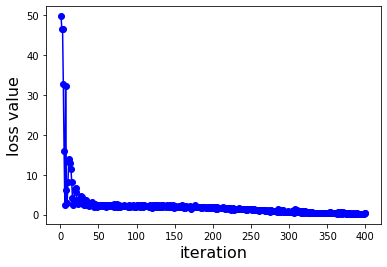

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r3/model_r3_1.25k_100epochs')